In [6]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
from camb.dark_energy import DarkEnergyModel

In [7]:
camb_path = os.path.realpath(os.path.join(os.getcwd(), '.'))
sys.path.insert(0, camb_path)
print('Using CAMB %s installed at %s'%(camb.__version__, os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /home/aldraper/CAMB/camb


In [8]:
pars = camb.CAMBparams()
pars.set_cosmology(H0 = 67.5, ombh2 = 0.022, omch2 = 0.122, mnu = 0.06, tau = 0.06)
pars.InitPower.set_params(As = 2.1e-9, ns = 0.965)
pars.DarkEnergy = DarkEnergyModel(w = -1.0, wa = 0.0)
pars.set_for_lmax(2500, lens_potential_accuracy=0)
pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)
pars.NonLinear = model.NonLinear_none #Linear spectra
results = camb.get_results(pars)

pars2 = camb.CAMBparams()
pars2.set_cosmology(H0 = 67.5, ombh2 = 0.022, omch2 = 0.122, mnu = 0.06, tau = 0.06)
pars2.InitPower.set_params(As = 2.1e-9, ns = 0.965)
pars2.DarkEnergy = DarkEnergyModel(w = -0.9, wa = 0.0)
pars2.set_for_lmax(2500, lens_potential_accuracy=0)
pars2.set_matter_power(redshifts=[0., 0.8], kmax=2.0)
pars.NonLinear = model.NonLinear_none #Linear spectra
results2 = camb.get_results(pars2)

pars3 = camb.CAMBparams()
pars3.set_cosmology(H0 = 67.5, ombh2 = 0.022, omch2 = 0.122, mnu = 0.06, tau = 0.06)
pars3.InitPower.set_params(As = 2.1e-9, ns = 0.965)
pars3.DarkEnergy = DarkEnergyModel(w = -1.2, wa = 0.0)
pars3.set_for_lmax(2500, lens_potential_accuracy=0)
pars3.set_matter_power(redshifts=[0., 0.8], kmax=2.0)
pars.NonLinear = model.NonLinear_none #Linear spectra
results3 = camb.get_results(pars3)

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


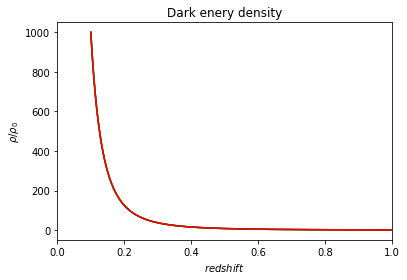

In [9]:
a = np.logspace(-1, -0.001, 1000)
z = 1.0/a - 1.0

rho, _ = results.get_dark_energy_rho_w(a)
rho2, _ = results2.get_dark_energy_rho_w(a)
rho3, _ = results3.get_dark_energy_rho_w(a)

plt.plot(a, rho, color='k')
plt.plot(a, rho2, color='g')
plt.plot(a, rho3, color='r')
plt.ylabel(r'$\rho/\rho_0$')
plt.xlabel('$redshift$')
plt.xlim(0,1)
plt.title('Dark enery density');

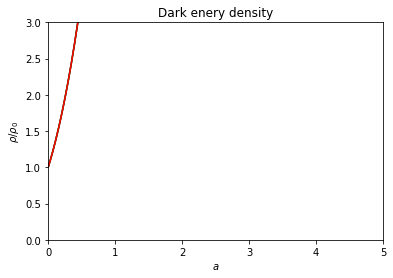

In [10]:
plt.plot(z, rho, color='k')
plt.plot(z, rho2, color='g')
plt.plot(z, rho3, color='r')
plt.ylabel(r'$\rho/\rho_0$')
plt.xlabel('$a$')
plt.xlim(0,5)
plt.ylim(0,3)
plt.title('Dark enery density');

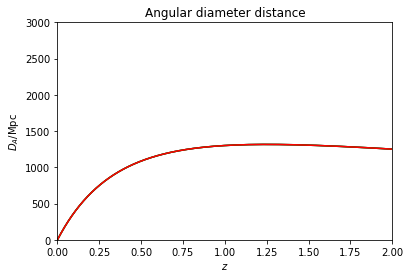

In [11]:
DA = results.angular_diameter_distance(z)
DA2 = results2.angular_diameter_distance(z)
DA3 = results3.angular_diameter_distance(z)
plt.plot(z, DA, color='k')
plt.plot(z, DA2, color='g')
plt.plot(z, DA3, color='r')
plt.xlabel('$z$')
plt.ylabel(r'$D_A /\rm{Mpc}$')
plt.title('Angular diameter distance')
plt.ylim([0,3000])
plt.xlim([0,2]);

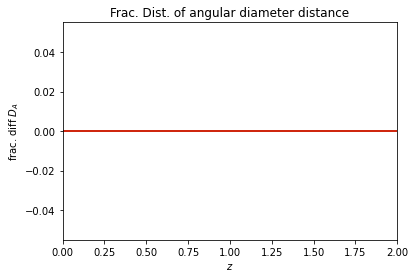

In [12]:
plt.plot(z, (DA2-DA)/DA, color='g')
plt.plot(z, (DA3-DA)/DA, color='r')
plt.xlabel('$z$')
plt.ylabel(r'frac. diff $D_A$')
plt.title('Frac. Dist. of angular diameter distance')
plt.xlim([0, 2]);

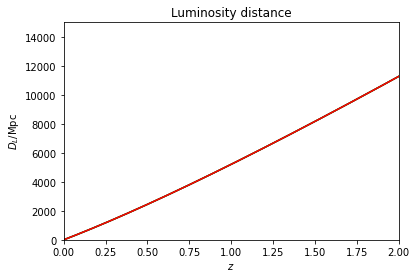

In [13]:
DL = DA * (1+z) * (1+z)
DL2 = DA2 * (1+z) * (1+z)
DL3 = DA3 * (1+z) * (1+z)
plt.plot(z, DL, color='k')
plt.plot(z, DL2, color='g')
plt.plot(z, DL3, color='r')
plt.xlabel('$z$')
plt.ylabel(r'$D_L /\rm{Mpc}$')
plt.title('Luminosity distance')
plt.ylim([0,15000])
plt.xlim([0,2]);

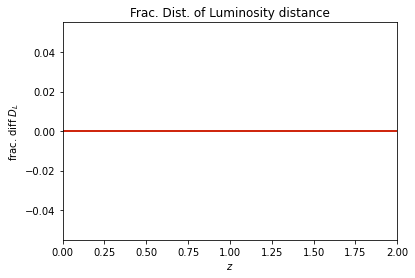

In [14]:
plt.plot(z, (DL2-DL)/DL, color='g')
plt.plot(z, (DL3-DL)/DL, color='r')
plt.xlabel('$z$')
plt.ylabel(r'frac. diff $D_L$')
plt.title('Frac. Dist. of Luminosity distance')
plt.xlim([0, 2]);

In [10]:
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
powers2 = results2.get_cmb_power_spectra(pars2, CMB_unit='muK')
powers3 = results3.get_cmb_power_spectra(pars3, CMB_unit='muK')

In [11]:
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [12]:
totCL = powers['total']
totCL2 = powers2['total']
totCL3 = powers3['total']
ls = np.arange(totCL.shape[0])

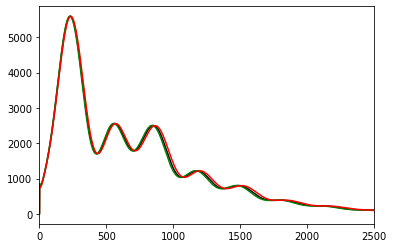

In [13]:
plt.plot(ls, totCL[:,0], color='k')
plt.plot(ls, totCL2[:,0], color='g')
plt.plot(ls, totCL3[:,0], color='r')
plt.xlim([0, 2500]);

In [14]:
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
kh2, z2, pk2 = results2.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
kh3, z3, pk3 = results3.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)